In [9]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import glob
import sys
import os

[sys.path.append(f) for f in glob.glob('utils/*')]
from preprocess import DataStruct
from firingrate import raster2FR
from plotting_utils import figSize

files = glob.glob('D:/T5_ClosedLoop/*')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Text(0.5, 0.98, 'D:/T5_ClosedLoop\\t5.2016.10.24.mat')

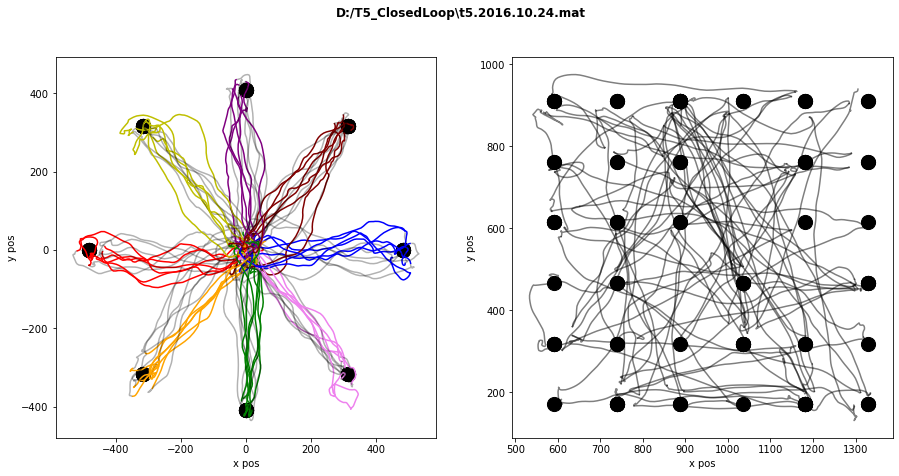

In [10]:
from matplotlib import colors 
figSize(7, 15)

n_trials         = 100

cmap             = colors.ListedColormap(['r', 'orange', 'y', 'g', 'k', 'purple', 'violet', 'maroon', 'b'])
unique, targetID = np.unique(np.vstack([dat.targetPos[i][0, :] for i in range(n_trials)]), return_inverse= True, axis = 0)


plt.subplot(1, 2, 1)
plt.xlabel('x pos')
plt.ylabel('y pos')
for i in range(n_trials):
    color       = cmap(targetID[i])
    plt.scatter(dat.targetPos[i][0, 0], dat.targetPos[i][0, 1], color = 'k', s = 200)
    alpha       = [0.3 if targetID[i]== 4 else 1][0]
    plt.plot(dat.cursorPos[i][:, 0], dat.cursorPos[i][:, 1], color = color, alpha = alpha)

plt.subplot(1, 2, 2)
plt.xlabel('x pos')
plt.ylabel('y pos')
for i in range(n_trials):
    trl         = np.where(dat.trialType == 'keyboard')[0][i]
    targPos     = dat.targetPos[trl][0, :]
    plt.scatter(targPos[0], targPos[1], color = 'k', s = 200)
    plt.plot(dat.cursorPos[trl][:, 0], dat.cursorPos[trl][:, 1], color = 'k', alpha = 0.5)
    
plt.suptitle(files[10], fontweight = 'bold')

Text(0.5, 0, 'Time (sec)')

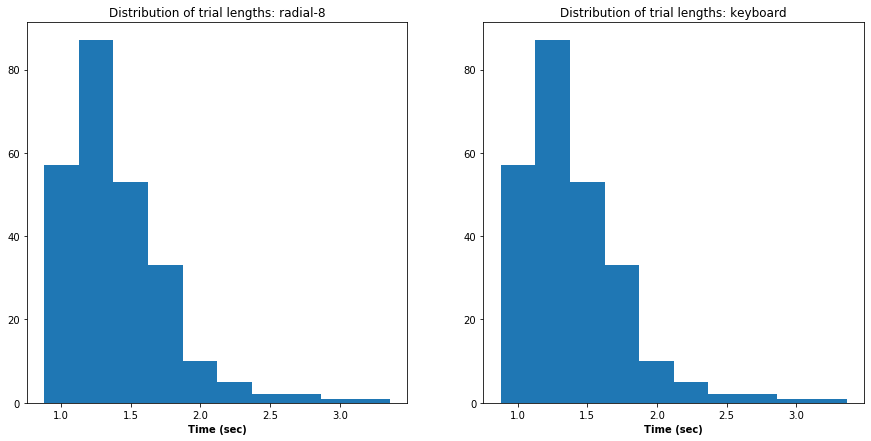

In [266]:
trlens_cursor   = [dat.TX[i].shape[0]/50 for i in np.where(dat.trialType == 'cursor')[0] ]
trlens_keyboard = [dat.TX[i].shape[0]/50 for i in np.where(dat.trialType == 'cursor')[0] ]

plt.subplot(1, 2, 1)
plt.hist(trlens_cursor)
plt.title('Distribution of trial lengths: radial-8')
plt.xlabel('Time (sec)', fontweight = 'bold')
plt.subplot(1, 2, 2)
plt.hist(trlens_cursor)
plt.title('Distribution of trial lengths: keyboard')
plt.xlabel('Time (sec)', fontweight = 'bold')

Text(0.5, 0.98, 'D:/T5_ClosedLoop\\t5.2016.10.24.mat')

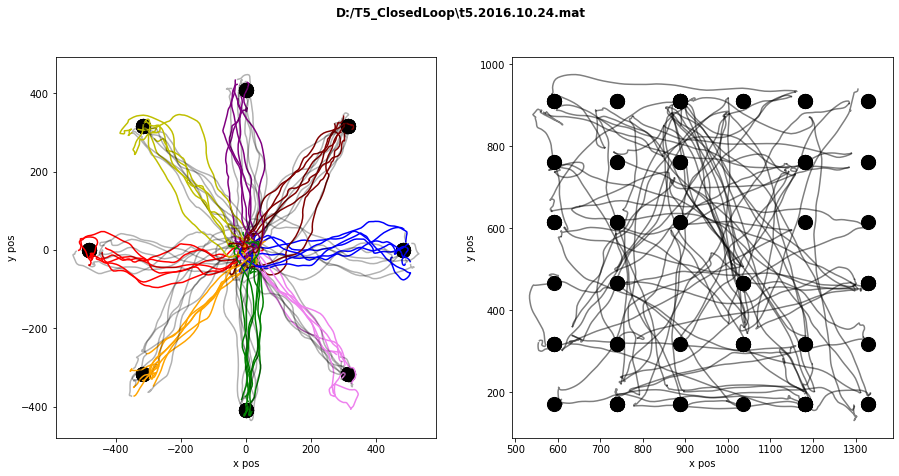